In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def Get_average(value):
    sum_mean = 0
    sum_sigma = 0
    for i in range(len(value)):
        sum_mean += value[i]
        
    return sum_mean/len(value)

In [3]:
df_1 = pd.read_csv('inputs/0_12p0_U_U_0p12_0p15_0p35_0p04_1_1',delim_whitespace=True)
Eb=12;x=0.12;y=0.15;z=0.35;pt2=0.04
#df_1 = pd.read_csv('inputs/0_12_U_U_0p2_0p1_0p5_0p04_1_1',delim_whitespace=True)
#Eb=12;x=0.2;y=0.1;z=0.5;pt2=0.04
df_1.head()

,dtau,dphi,excxs
0,-0.096116,0.031416,0.002374
1,-0.096116,0.094248,0.002253
2,-0.096116,0.157080,0.001737
3,-0.096116,0.219911,0.001590
4,-0.096116,0.282743,0.001433


In [4]:
dphis = df_1['dphi'].unique()
print(len(dphis))
print(dphis)

100
[0.0314159 0.0942478 0.15708   0.219911  0.282743  0.345575  0.408407
 0.471239  0.534071  0.596903  0.659734  0.722566  0.785398  0.84823
 0.911062  0.973894  1.03673   1.09956   1.16239   1.22522   1.28805
 1.35088   1.41372   1.47655   1.53938   1.60221   1.66504   1.72788
 1.79071   1.85354   1.91637   1.9792    2.04204   2.10487   2.1677
 2.23053   2.29336   2.35619   2.41903   2.48186   2.54469   2.60752
 2.67035   2.73319   2.79602   2.85885   2.92168   2.98451   3.04734
 3.11018   3.17301   3.23584   3.29867   3.3615    3.42434   3.48717
 3.55      3.61283   3.67566   3.7385    3.80133   3.86416   3.92699
 3.98982   4.05265   4.11549   4.17832   4.24115   4.30398   4.36681
 4.42965   4.49248   4.55531   4.61814   4.68097   4.7438    4.80664
 4.86947   4.9323    4.99513   5.05796   5.1208    5.18363   5.24646
 5.30929   5.37212   5.43496   5.49779   5.56062   5.62345   5.68628
 5.74911   5.81195   5.87478   5.93761   6.00044   6.06327   6.12611
 6.18894   6.25177  ]


In [5]:
dtaus = df_1['dtau'].unique()
print(len(dtaus))
print(dtaus)
tau_range = dtaus[-1]-dtaus[0]

100
[-0.0961159 -0.0554182 -0.0147205  0.0259772  0.0666749  0.107373
  0.14807    0.188768   0.229466   0.270163   0.310861   0.351559
  0.392256   0.432954   0.473652   0.51435    0.555047   0.595745
  0.636443   0.67714    0.717838   0.758536   0.799233   0.839931
  0.880629   0.921326   0.962024   1.00272    1.04342    1.08412
  1.12481    1.16551    1.20621    1.24691    1.28761    1.3283
  1.369      1.4097     1.4504     1.49109    1.53179    1.57249
  1.61319    1.65389    1.69458    1.73528    1.77598    1.81668
  1.85737    1.89807    1.93877    1.97947    2.02016    2.06086
  2.10156    2.14226    2.18296    2.22365    2.26435    2.30505
  2.34575    2.38644    2.42714    2.46784    2.50854    2.54923
  2.58993    2.63063    2.67133    2.71203    2.75272    2.79342
  2.83412    2.87482    2.91551    2.95621    2.99691    3.03761
  3.0783     3.119      3.1597     3.2004     3.2411     3.28179
  3.32249    3.36319    3.40389    3.44458    3.48528    3.52598
  3.56668    3.607

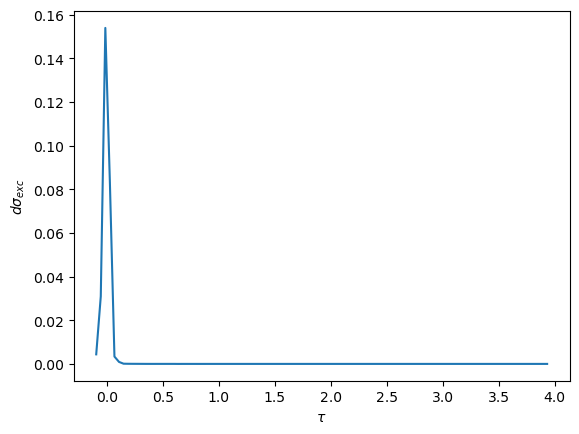

In [6]:
exc_xss_tau = []
for i_dtau in dtaus:
    #print(i_dtau)
    df_tau = df_1[df_1['dtau']==i_dtau]
    phis = df_tau['dphi']
    i_exc_xss = df_tau['excxs'].to_list()
    #print(phis)
    exc_xs = 2*math.pi*Get_average(i_exc_xss)
    exc_xss_tau.append(exc_xs)
plt.plot(dtaus,exc_xss_tau)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$d\sigma_{exc}$')
plt.savefig('results/exc_xs_tau.pdf')

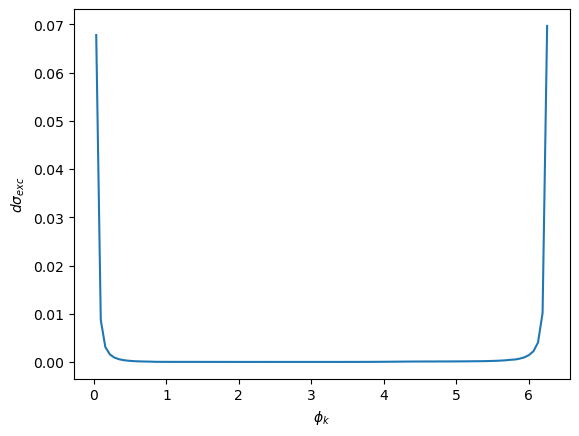

In [7]:
exc_xss_phis = []
for i_phis in dphis:
    #print(i_dtau)
    df_phis = df_1[df_1['dphi']==i_phis]
    taus = df_phis['dtau']
    i_exc_xss = df_phis['excxs'].to_list()
    #print(phis)
    exc_xs = tau_range*Get_average(i_exc_xss)
    exc_xss_phis.append(exc_xs)
plt.plot(dphis,exc_xss_phis)
plt.xlabel(r'$\phi_k$')
plt.ylabel(r'$d\sigma_{exc}$')
plt.savefig('results/exc_xs_phis.pdf')

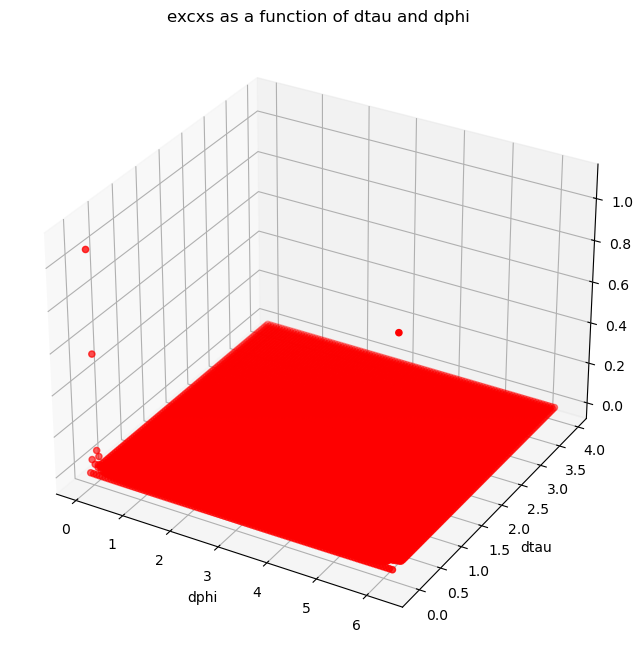

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_1['dphi'], df_1['dtau'], df_1['excxs'],c='r',marker = 'o')
# Add labels and title
ax.set_xlabel('dphi')
ax.set_ylabel('dtau')
ax.set_zlabel('excxs')
ax.set_title('excxs as a function of dtau and dphi')

# Show the plot
plt.show()

In [9]:
def Get_taus_taup(Eb,x,y):
    mP = 0.938
    S = s=mP**2+2*mP*Eb
    Q2 = x*s*y
    taus = Q2/S
    X = (1-y)*s
    tauf = Q2/X
    return taus,tauf
    

In [10]:
Eb = 10.65
x = 0.2
y = 0.7
taus = Get_taus_taup(Eb, x,y)[0]
print(taus)
taup = Get_taus_taup(Eb, x,y)[1]
print(taup)

0.13999999999999999
0.46666666666666656


In [25]:

def Get_taus_taup(Eb,x,Q2):
    mP = 0.93827199999999
    S = 2*mP*Eb
    print('S is ',S)
    y = Q2/x/S
    taus = Q2/S
    X = (1-y)*S
    print('X is ',X)
    tauf = Q2/X
    return -taus,tauf
    

In [26]:
Eb = 10.65
x = 0.199
Q2 = 0.6226484334
taus = Get_taus_taup(Eb, x,Q2)[0]
print(taus)
taup = Get_taus_taup(Eb, x,Q2)[1]
print(taup)

S is  19.98519359999979
X is  16.85630699999979
-0.03115548669991401
S is  19.98519359999979
X is  16.85630699999979
0.036938603064123575
